# Session 4: Stay classy, Düsseldorf! - Clustering

Florian Roscheck, 2022-05-01

Notebook zur Veranstaltung Business Analytics A im [Masterstudiengang Business Analytics](https://wiwi.hs-duesseldorf.de/en/student-affairs/study-programmes/master-business-analytics) an der Hochschule Düsseldorf.

Datenquelle:
European Commission, Brussels (2016). Flash Eurobarometer 425 (Food Waste and Date Marking). *GESIS Data Archive, Cologne. ZA6647 Data file Version 1.0.0, https://doi.org/10.4232/1.12515.*



## Daten einlesen

Hier lesen wir einen modifizierten Datensatz ein. Dieser ist auf Moodle verfügbar.

In [1]:
# Datensatz mit pandas einlesen
import pandas as pd

data = pd.read_parquet('../data/interim/data_numeric.parquet')

In [2]:
# 5 zufällige Zeilen als Beispiel anzeigen
data.sample(5)

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,no_date_spaghetti_throw_away,gender_Female
6611,2.0,24,22.0,3.0,53.0000,-8.0000,1.0,0.0,0.0,0.0,0.0000,0,1
7639,4.0,44,14.0,2.0,42.8333,12.8333,2.0,2.0,3.0,1.0,0.5800,0,0
6930,4.0,74,18.0,1.0,53.0000,-8.0000,1.0,0.0,0.0,2.0,0.1139,0,1
16099,1.0,50,22.0,2.0,49.7500,15.5000,1.0,1.0,2.0,1.0,0.5000,0,0
362,4.0,50,26.0,4.0,50.8333,4.0000,2.0,2.0,2.0,2.0,0.3645,0,1


## Mit fehlenden Werten umgehen

In [3]:
# Stelle fest, welche Werte in der Tabelle NaNs (=leer) sind
data.isna()

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,no_date_spaghetti_throw_away,gender_Female
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26596,False,False,False,False,False,False,False,False,False,False,False,False,False
26597,False,False,False,False,False,False,False,False,False,False,False,False,False
26598,False,False,False,False,False,False,False,True,False,False,False,False,False
26599,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Zähle pro Spalte zusammen, wie viele Werte leer sind
data.isna().sum()

look_at_dates                    193
age                                0
age_stop_edu                    1920
household_size                   159
cntrylat                           0
cntrylon                           0
best_before_meaning_map         1122
validity_meaning_map            1126
work_scale                        85
population_density               199
salary                           111
no_date_spaghetti_throw_away       0
gender_Female                      0
dtype: int64

In [5]:
# Wenn wir alle Zeilen, die leere Werte enthalten, entfernen, wie viel Prozent der Tabelle sind noch übrig?

# Teile die Länge der Tabelle, aus der Zeilen mit leeren Werten entfernt wurden,
# durch die Länge der Tabelle, in der alle Zeilen enthalten sind

len(data.dropna())/len(data)

0.8509454531784519

Ca. 85% der Tabelle würden übrig bleiben.

In [6]:
# Entferne alle Zeilen der Tabelle, die leere Werte enthalten
data = data.dropna()

## Duplikate entfernen

In [7]:
# Zeige für jede Zeile, ob diese das Duplikat einer anderen Zeile ist
data.duplicated()

0        False
1        False
2        False
4        False
5        False
         ...  
26594    False
26596    False
26597    False
26599    False
26600    False
Length: 22636, dtype: bool

In [8]:
# Zeige nur Zeilen, die Duplikate anderer Zeilen sind
data[data.duplicated()==True]

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,no_date_spaghetti_throw_away,gender_Female
963,4.0,62,20.0,2.0,50.8333,4.0000,1.0,1.0,0.0,0.0,0.1139,0,1
1744,4.0,86,23.0,1.0,56.0000,10.0000,1.0,1.0,0.0,2.0,0.1139,1,1
1997,4.0,66,22.0,2.0,56.0000,10.0000,2.0,2.0,0.0,1.0,0.1139,0,1
2789,4.0,41,18.0,3.0,39.0000,22.0000,1.0,0.0,0.0,2.0,0.0000,1,1
2802,4.0,40,18.0,2.0,39.0000,22.0000,2.0,2.0,0.0,2.0,0.0000,1,1
2911,4.0,50,22.0,5.0,39.0000,22.0000,0.0,0.0,2.0,1.0,0.3200,0,1
3668,4.0,49,25.0,2.0,40.0000,-4.0000,1.0,0.0,3.0,2.0,1.0000,0,0
5703,4.0,68,17.0,2.0,46.0000,2.0000,2.0,2.0,0.0,0.0,0.1139,0,1
6405,4.0,56,22.0,1.0,53.0000,-8.0000,1.0,0.0,2.0,2.0,0.5000,0,1
10266,4.0,62,19.0,2.0,47.3333,13.3333,2.0,2.0,0.0,0.0,0.1139,0,1


In [9]:
# Entferne Zeilen, die Duplikate anderer Zeilen sind

print('Zeilen vor Duplikatentfernung: ', len(data))

data = data[data.duplicated()==False]

print('Zeilen nach Duplikatentfernung: ', len(data))

Zeilen vor Duplikatentfernung:  22636
Zeilen nach Duplikatentfernung:  22602


## Spalte für später aufheben

In [10]:
# Die für die Clusteranalyse nicht benötigte Spalte
# "no_date_spaghetti_throw_away" in einer Variable speichern

labels = data['no_date_spaghetti_throw_away']

# Lösche die Spalte aus dem Datensatz
data = data.drop(columns='no_date_spaghetti_throw_away')

## Korrelationsmatrix berechnen

In [11]:
# Berechne Korrelationsmatrix
corr = data.corr()
corr

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
look_at_dates,1.000000,-0.018086,0.048131,-0.007688,-0.046038,-0.023512,-0.026345,-0.059237,0.002063,0.058242,0.001092,0.120618
age,-0.018086,1.000000,-0.067765,-0.246758,0.116217,-0.024962,0.065229,0.106370,-0.505467,-0.013458,-0.338823,0.074436
age_stop_edu,0.048131,-0.067765,1.000000,-0.033383,0.154812,0.095928,0.013119,-0.015260,0.155339,0.116166,0.182410,-0.047995
household_size,-0.007688,-0.246758,-0.033383,1.000000,-0.166927,0.052551,-0.059370,-0.044758,0.149625,-0.082184,0.077844,-0.022459
cntrylat,-0.046038,0.116217,0.154812,-0.166927,1.000000,0.156853,0.128519,0.101711,-0.017027,-0.010266,0.038361,-0.038730
cntrylon,-0.023512,-0.024962,0.095928,0.052551,0.156853,1.000000,-0.127889,-0.085519,-0.011246,0.114569,0.009702,0.011561
best_before_meaning_map,-0.026345,0.065229,0.013119,-0.059370,0.128519,-0.127889,1.000000,0.378513,-0.032185,-0.044443,-0.016188,0.000627
validity_meaning_map,-0.059237,0.106370,-0.015260,-0.044758,0.101711,-0.085519,0.378513,1.000000,-0.064258,-0.056563,-0.052016,0.011457
work_scale,0.002063,-0.505467,0.155339,0.149625,-0.017027,-0.011246,-0.032185,-0.064258,1.000000,0.034063,0.835259,-0.126720
population_density,0.058242,-0.013458,0.116166,-0.082184,-0.010266,0.114569,-0.044443,-0.056563,0.034063,1.000000,0.063467,0.002421


In [12]:
# Stelle Korrelationsmatrix mit gerundeten Werten da
corr.round(2)

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
look_at_dates,1.00,-0.02,0.05,-0.01,-0.05,-0.02,-0.03,-0.06,0.00,0.06,0.00,0.12
age,-0.02,1.00,-0.07,-0.25,0.12,-0.02,0.07,0.11,-0.51,-0.01,-0.34,0.07
age_stop_edu,0.05,-0.07,1.00,-0.03,0.15,0.10,0.01,-0.02,0.16,0.12,0.18,-0.05
household_size,-0.01,-0.25,-0.03,1.00,-0.17,0.05,-0.06,-0.04,0.15,-0.08,0.08,-0.02
cntrylat,-0.05,0.12,0.15,-0.17,1.00,0.16,0.13,0.10,-0.02,-0.01,0.04,-0.04
cntrylon,-0.02,-0.02,0.10,0.05,0.16,1.00,-0.13,-0.09,-0.01,0.11,0.01,0.01
best_before_meaning_map,-0.03,0.07,0.01,-0.06,0.13,-0.13,1.00,0.38,-0.03,-0.04,-0.02,0.00
validity_meaning_map,-0.06,0.11,-0.02,-0.04,0.10,-0.09,0.38,1.00,-0.06,-0.06,-0.05,0.01
work_scale,0.00,-0.51,0.16,0.15,-0.02,-0.01,-0.03,-0.06,1.00,0.03,0.84,-0.13
population_density,0.06,-0.01,0.12,-0.08,-0.01,0.11,-0.04,-0.06,0.03,1.00,0.06,0.00


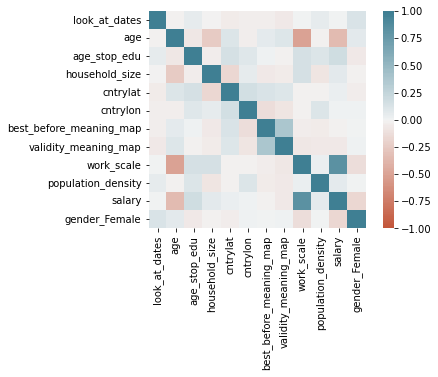

In [13]:
# Mache einen Plot der Korrelationsmatrix
import seaborn as sns

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

<AxesSubplot:xlabel='age', ylabel='work_scale'>

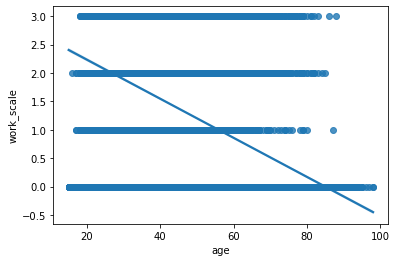

In [14]:
# Plotte eine lineare Regression zwischen age und work scale
sns.regplot(data=data, x='age', y='work_scale')

<AxesSubplot:xlabel='age', ylabel='work_scale_cat'>

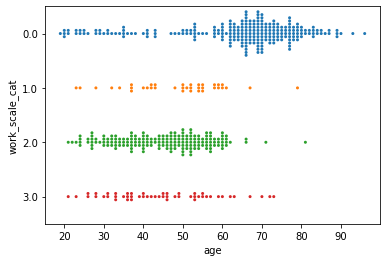

In [15]:
# Plotte einen Swarmplot
df_tmp = data.copy()
df_tmp['work_scale_cat'] = df_tmp['work_scale']\
    .astype('category')
sns.swarmplot(data=df_tmp.sample(500),
              x='age',
              y='work_scale_cat',
              size=3)

## Clustern mit k-Means

In [16]:
# Datensatz ausgeben
data

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
0,2.0,64,13.0,2.0,50.8333,4.0,2.0,1.0,0.0,0.0,0.1139,1
1,4.0,87,15.0,1.0,50.8333,4.0,1.0,0.0,0.0,1.0,0.1139,1
2,4.0,73,30.0,1.0,50.8333,4.0,1.0,1.0,0.0,1.0,0.1139,0
4,4.0,74,24.0,1.0,50.8333,4.0,0.0,0.0,0.0,1.0,0.1139,1
5,4.0,21,18.0,2.0,50.8333,4.0,0.0,0.0,1.0,1.0,0.2850,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26594,4.0,28,18.0,1.0,45.1667,15.5,0.0,0.0,2.0,1.0,0.3645,1
26596,1.0,42,18.0,1.0,45.1667,15.5,1.0,1.0,0.0,2.0,0.0000,1
26597,4.0,37,19.0,4.0,45.1667,15.5,0.0,0.0,2.0,1.0,0.3200,0
26599,4.0,57,23.0,2.0,45.1667,15.5,0.0,2.0,0.0,1.0,0.1139,1


In [17]:
# Spaltenweisen Durchschnitt ausgeben
data.mean()

look_at_dates               3.328511
age                        54.438855
age_stop_edu               20.679586
household_size              2.290240
cntrylat                   49.334213
cntrylon                   13.431187
best_before_meaning_map     0.998717
validity_meaning_map        0.863198
work_scale                  1.048934
population_density          0.988320
salary                      0.274835
gender_Female               0.624900
dtype: float64

In [18]:
# Spaltenweise Standardabweichung ausgeben
data.std()

look_at_dates               1.027471
age                        16.151461
age_stop_edu                5.779848
household_size              1.165178
cntrylat                    6.996555
cntrylon                   10.624097
best_before_meaning_map     0.746153
validity_meaning_map        0.831097
work_scale                  1.099168
population_density          0.791668
salary                      0.245872
gender_Female               0.484159
dtype: float64

In [19]:
# Daten skalieren
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data)

X

array([[-1.2930194 ,  0.5919809 , -1.32871239, ..., -1.24842899,
        -0.65456171,  0.77476118],
       [ 0.65355032,  2.01603218, -0.98267488, ...,  0.01475447,
        -0.65456171,  0.77476118],
       [ 0.65355032,  1.14921836,  1.61260645, ...,  0.01475447,
        -0.65456171, -1.29072032],
       ...,
       [ 0.65355032, -1.07973146, -0.29059986, ...,  0.01475447,
         0.18369862, -1.29072032],
       [ 0.65355032,  0.15857399,  0.40147516, ...,  0.01475447,
        -0.65456171,  0.77476118],
       [-2.26630425,  0.34431981,  0.74751267, ...,  1.27793792,
         0.36469127, -1.29072032]])

In [20]:
# Spaltenweisen Durchschnitt ausgeben
X.mean(axis=0)

array([-1.20718702e-16, -1.15688756e-16, -5.40719187e-17, -1.40838486e-16,
        4.20000484e-16,  2.01197837e-17,  4.02395674e-17, -2.01197837e-17,
        4.02395674e-17, -5.28144322e-17, -1.23233675e-16, -1.25748648e-16])

In [21]:
# Spaltenweise Standardabweichung ausgeben
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
# Pandas DataFrame aus NumPy-Array erstellen und ausgeben
data_scaled = pd.DataFrame(X, index=data.index, columns=data.columns)
data_scaled

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
0,-1.293019,0.591981,-1.328712,-0.249100,0.214266,-0.887736,1.341958,0.164608,-0.954319,-1.248429,-0.654562,0.774761
1,0.653550,2.016032,-0.982675,-1.107357,0.214266,-0.887736,0.001720,-1.038648,-0.954319,0.014754,-0.654562,0.774761
2,0.653550,1.149218,1.612606,-1.107357,0.214266,-0.887736,0.001720,0.164608,-0.954319,0.014754,-0.654562,-1.290720
4,0.653550,1.211134,0.574494,-1.107357,0.214266,-0.887736,-1.338519,-1.038648,-0.954319,0.014754,-0.654562,0.774761
5,0.653550,-2.070376,-0.463619,-0.249100,0.214266,-0.887736,-1.338519,-1.038648,-0.044520,0.014754,0.041345,0.774761
...,...,...,...,...,...,...,...,...,...,...,...,...
26594,0.653550,-1.636969,-0.463619,-1.107357,-0.595665,0.194733,-1.338519,-1.038648,0.865279,0.014754,0.364691,0.774761
26596,-2.266304,-0.770155,-0.463619,-1.107357,-0.595665,0.194733,0.001720,0.164608,-0.954319,1.277938,-1.117822,0.774761
26597,0.653550,-1.079731,-0.290600,1.467413,-0.595665,0.194733,-1.338519,-1.038648,0.865279,0.014754,0.183699,-1.290720
26599,0.653550,0.158574,0.401475,-0.249100,-0.595665,0.194733,-1.338519,1.367864,-0.954319,0.014754,-0.654562,0.774761


In [23]:
# NumPy-Array aus Pandas DataFrame erstellen und ausgeben
data_scaled_numpy = data_scaled.values
data_scaled_numpy

array([[-1.2930194 ,  0.5919809 , -1.32871239, ..., -1.24842899,
        -0.65456171,  0.77476118],
       [ 0.65355032,  2.01603218, -0.98267488, ...,  0.01475447,
        -0.65456171,  0.77476118],
       [ 0.65355032,  1.14921836,  1.61260645, ...,  0.01475447,
        -0.65456171, -1.29072032],
       ...,
       [ 0.65355032, -1.07973146, -0.29059986, ...,  0.01475447,
         0.18369862, -1.29072032],
       [ 0.65355032,  0.15857399,  0.40147516, ...,  0.01475447,
        -0.65456171,  0.77476118],
       [-2.26630425,  0.34431981,  0.74751267, ...,  1.27793792,
         0.36469127, -1.29072032]])

In [24]:
# Datentyp einer Variable überprüfen
type(data_scaled_numpy)

numpy.ndarray

In [25]:
# Daten clustern
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [26]:
# Inspiziere die den Datenpunkten zugeordneten Cluster
predictions = model.labels_
predictions

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [27]:
# Füge das Cluster als Spalte zum Datensatz hinzu
data_with_predictions = data.copy()
data_with_predictions['cluster'] = predictions

## Cluster analysieren

In [28]:
# Seaborn initialisieren
sns.set()

<AxesSubplot:xlabel='age', ylabel='salary'>

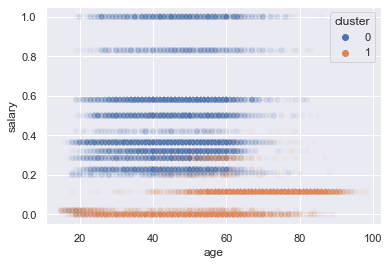

In [29]:
# XY-Plot von Alter und Gehalt plotten
sns.scatterplot(data=data_with_predictions,
                x='age',
                y='salary',
                alpha=0.04,
                hue='cluster')

In [30]:
# Spaltendurchschnitte pro Cluster ausgeben
data_with_predictions.groupby('cluster').mean()

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
cluster,,,,,,,,,,,,
0,3.339645,45.030958,21.630205,2.505205,49.284748,13.440189,0.967875,0.792893,2.081210,1.021177,0.461934,0.557340
1,3.317682,63.588933,19.755018,2.081166,49.382322,13.422431,1.028714,0.931576,0.044947,0.956362,0.092863,0.690609


In [31]:
from matplotlib import pyplot as plt

<AxesSubplot:>

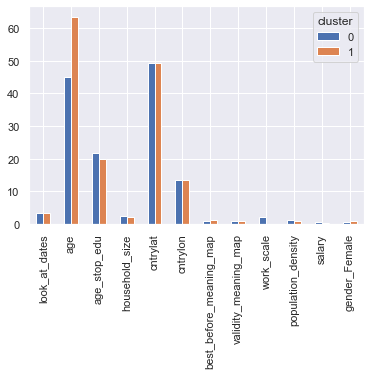

In [32]:
# Spaltendurchschnitte pro Cluster plotten
data_with_predictions.groupby('cluster').mean().T.plot.bar()

In [33]:
# Cluster-Spalte zu skalierten Daten hinzufügen
data_scaled_with_predictions = data_scaled.copy()
data_scaled_with_predictions['cluster'] = predictions

<AxesSubplot:>

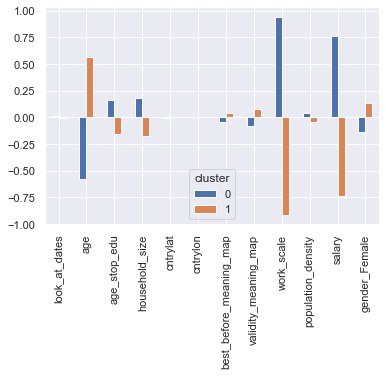

In [34]:
# Skalierte Spaltendurchschnitte pro Cluster plotten
data_scaled_with_predictions.groupby('cluster').mean().T.plot.bar()

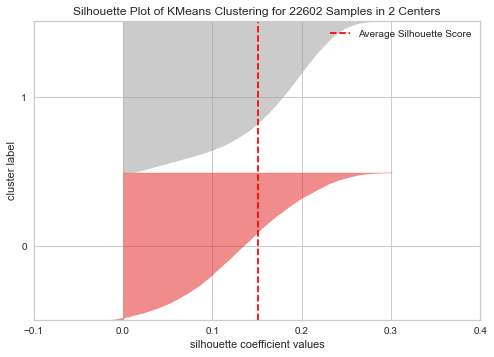

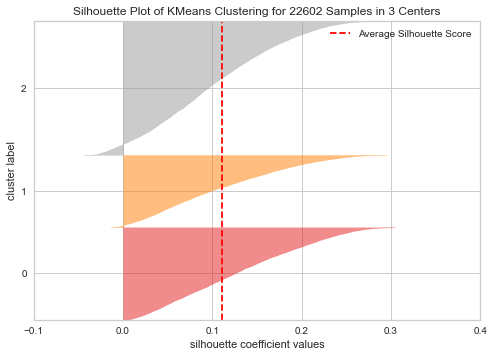

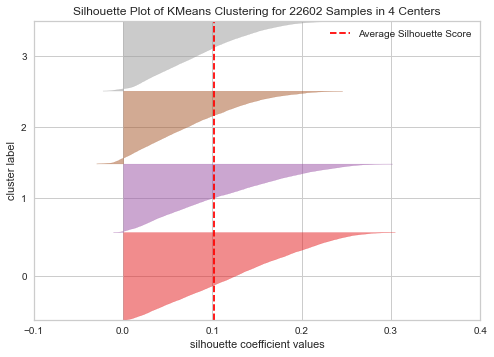

In [35]:
# Erstelle Silhouette-Plots für mehrere Clusterkonfigurationen
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from matplotlib import pyplot as plt

for k in [2,3,4]:
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42))
    sil.fit(X)
    sil.finalize()
    plt.show()

<AxesSubplot:>

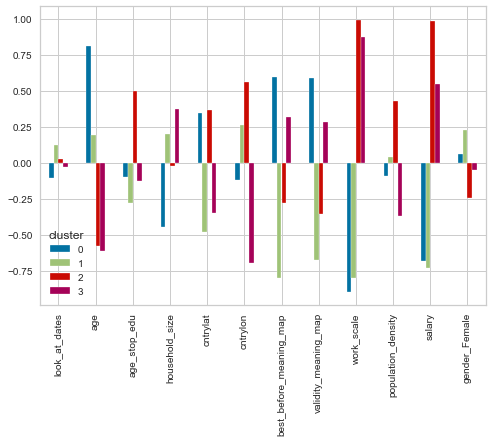

In [36]:
# Vier Cluster erstellen und plotten
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state=42)
model.fit(X)
predictions = model.labels_

data_scaled_with_predictions = data_scaled.copy()
data_scaled_with_predictions['cluster'] = predictions

data_scaled_with_predictions.groupby('cluster').mean().T.plot.bar()

- **Cluster 0:** Älter, Position mit wenig Verantwortung oder arbeitssuchend/in Rente, geringes Gehalt, progressiv hinsichtlich Haltbarkeitsdaten, eher alleinstehend
- **Cluster 1:** Sehr konservativ hinsichtlich Haltbarkeitsdaten, Position mit wenig Verantwortung oder arbeitssuchend/in Rente, geringes Gehalt
- **Cluster 2:** Leitende Position, hochbezahlt, eher jung, eher im Osten Europas, eher später Ausbildungsabschluss, eher in der Stadt wohnend
- **Cluster 3:** Leitende Position, eher jung, eher im Westen Europas, eher auf dem Land wohnend

In [37]:
# Zähle die Befragten pro Cluster pro Spalte
rows_per_cluster_per_column = data_scaled_with_predictions.groupby('cluster').count()
rows_per_cluster_per_column

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
cluster,,,,,,,,,,,,
0,6639,6639,6639,6639,6639,6639,6639,6639,6639,6639,6639,6639
1,5177,5177,5177,5177,5177,5177,5177,5177,5177,5177,5177,5177
2,5514,5514,5514,5514,5514,5514,5514,5514,5514,5514,5514,5514
3,5272,5272,5272,5272,5272,5272,5272,5272,5272,5272,5272,5272


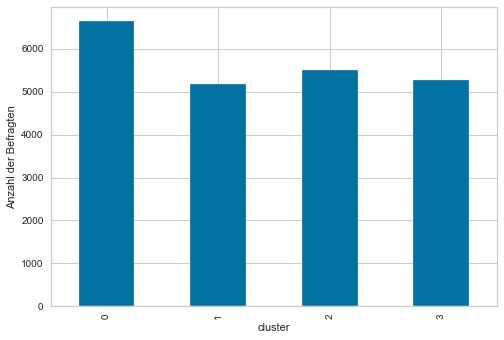

In [38]:
# Wähle nur die erste Spalte und erstelle ein Balkendiagramm
rows_per_cluster = rows_per_cluster_per_column.iloc[:,0]
rows_per_cluster.plot.bar(ylabel='Anzahl der Befragten')
plt.savefig('barp.png', dpi=150)

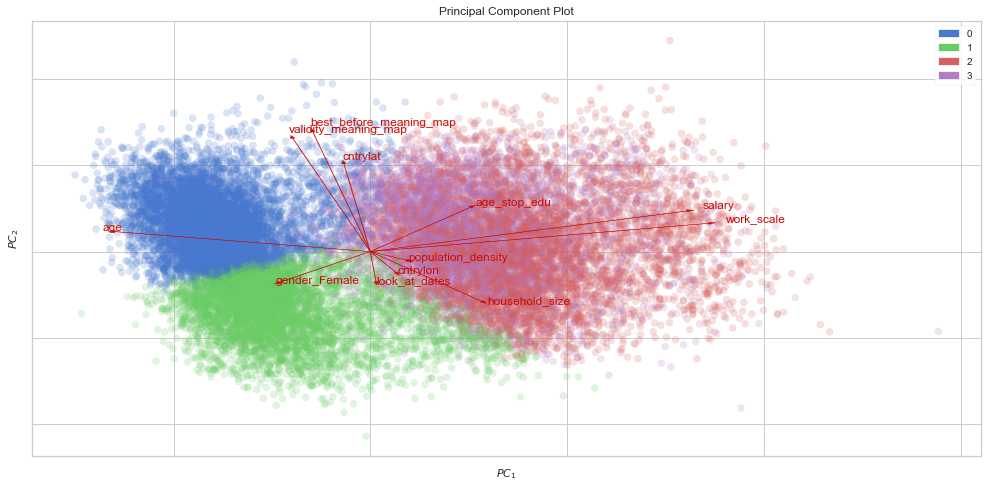

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [63]:
# Plotte die Principal Components des Datensatzes
from yellowbrick.features import PCA

classes = ['0', '1', '2', '3']

visualizer = PCA(classes=classes,
                 proj_features=True,
                 alpha=0.2,
                 colormap='sns_muted',
                 size=(1000,500))

visualizer.fit_transform(data_scaled, predictions)
visualizer.show()

In [41]:
# PCA mit Scikit-learn durchführen
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca_fit = pca.fit(data_scaled)

<AxesSubplot:label='a890ad20-157d-4ec1-9cd4-0d297a02390b'>

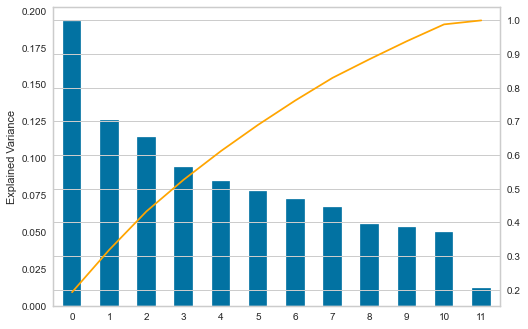

In [60]:
# Scree-Plot mit Pareto-Plot ausgeben
pd.Series(pca.explained_variance_ratio_)\
    .plot.bar(ylabel='Explained Variance')
pd.Series(pca.explained_variance_ratio_).cumsum()\
    .plot.line(ylabel='Explained Variance',
               secondary_y=True,
               color='orange')

## Klassifizierung

In [77]:
# Zählen, wie viele Befragte die Spaghetti
# wegschmeißen würden
labels.value_counts()

0    16702
1     5900
Name: no_date_spaghetti_throw_away, dtype: int64

In [70]:
# Nearest-Neighbor-Modell trainieren
# (an die Daten anpassen)
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(data_scaled, labels)

KNeighborsClassifier()

In [85]:
# Wähle zufällig ein paar Zeilen aus,
# die das Modell vorhersagen soll
data_to_predict = data_scaled.sample(5)
data_to_predict

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
25557,0.653550,0.158574,-0.463619,1.467413,-0.476561,0.147669,0.001720,1.367864,-0.954319,-1.248429,-0.654562,0.774761
22406,0.653550,0.530066,0.574494,-0.249100,0.381023,0.618307,-1.338519,-1.038648,0.865279,0.014754,2.949429,0.774761
25205,-1.293019,-0.212918,-0.982675,0.609157,-0.476561,0.147669,0.001720,0.164608,-0.954319,-1.248429,-1.117822,0.774761
16288,0.653550,0.530066,0.228456,-0.249100,0.059429,0.194733,1.341958,-1.038648,-0.954319,-1.248429,-0.654562,-1.290720
17812,0.653550,0.096659,-0.463619,-0.249100,1.381537,1.183074,0.001720,0.164608,0.865279,-1.248429,0.364691,0.774761


In [86]:
# Wähle für genau jene Zeilen die Antwort
# auf die Spaghetti-Frage aus
labels_to_predict = labels[data_to_predict.index]
labels_to_predict

25557    1
22406    1
25205    0
16288    1
17812    0
Name: no_date_spaghetti_throw_away, dtype: uint8

In [87]:
# Mit dem Modell die gewählten Zeilen vorhersagen
model.predict(data_to_predict)

array([0, 1, 0, 0, 0], dtype=uint8)

In [100]:
# Sage alle bereits bekannten Beobachtungen voraus
all_predictions = model.predict(data_scaled)

In [104]:
# Werte aus, wie viele Vorhersagen stimmen
correct_predictions = all_predictions==labels
correct_predictions.value_counts(normalize=True)

True     0.799796
False    0.200204
Name: no_date_spaghetti_throw_away, dtype: float64

In [90]:
# Daten für Fantasieperson definieren

new_data_to_predict = pd.Series({
    'look_at_dates': 2, # manchmal
    'age': 30,
    'age_stop_edu': 22,
    'household_size': 2,
    'cntrylat': 51.23, # Düsseldorf
    'cntrylon': 6.783,
    'best_before_meaning_map': 1, # Kommt aufs Lebensmittel an
    'validity_meaning_map': 1,
    'work_scale': 2, # Angestellt
    'population_density': 3, # Große Stadt
    'salary': 0.25, # Ca. 2.5k Euro
    'gender_Female': 0
})
new_data_to_predict

look_at_dates               2.000
age                        30.000
age_stop_edu               22.000
household_size              2.000
cntrylat                   51.230
cntrylon                    6.783
best_before_meaning_map     1.000
validity_meaning_map        1.000
work_scale                  2.000
population_density          3.000
salary                      0.250
gender_Female               0.000
dtype: float64

In [94]:
# Daten skalieren
new_data_to_predict_for_scaler = new_data_to_predict.values.reshape(1, -1)
new_data_to_predict_scaled = scaler.transform(new_data_to_predict_for_scaler)
new_data_to_predict_scaled

array([[-1.29301940e+00, -1.51313838e+00,  2.28456408e-01,
        -2.49100286e-01,  2.70966106e-01, -6.25778754e-01,
         1.71962245e-03,  1.64607863e-01,  8.65278943e-01,
         2.54112137e+00, -1.01008912e-01, -1.29072032e+00]])

In [95]:
# Wegwerfverhalten vorhersagen
model.predict(new_data_to_predict_scaled)

array([0], dtype=uint8)